This model tries to create a prediction model that uses the stats of the previous year to determine how many games a 
team will win the next season.

In [3]:
import pandas as pd
import numpy as np
import time
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# 2017 data
data_2017 = pd.read_csv("2017 Data.txt")
NFC_2017 = pd.read_csv("NFC Wins 2017.txt")
AFC_2017 = pd.read_csv("AFC Wins 2017.txt")

# 2018 data
data_2018 = pd.read_csv("2018 Data.txt")
NFC_2018 = pd.read_csv("NFC Wins 2018.txt")
AFC_2018 = pd.read_csv("AFC Wins 2018.txt")

# 2019 data
data_2019 = pd.read_csv("2019 Data.txt")
NFC_2019 = pd.read_csv("NFC Wins 2019.txt")
AFC_2019 = pd.read_csv("AFC Wins 2019.txt")

# 2020 data
data_2020 = pd.read_csv("2020 Data.txt")
NFC_2020 = pd.read_csv("NFC Wins 2020.txt")
AFC_2020 = pd.read_csv("AFC Wins 2020.txt")

# 2021 data
data_2021 = pd.read_csv("2021 Data.txt")
NFC_2021 = pd.read_csv("NFC Wins 2021.txt")
AFC_2021 = pd.read_csv("AFC Wins 2021.txt")

In [4]:
# function to acquire training and testing data function
def get_data(data, afc_wins , nfc_wins, year):
    team_wins_year = pd.concat((nfc_wins,afc_wins),axis = 0).reset_index(drop=True) # combining all team win totals together
    data_year = pd.merge(team_wins_year,data) # merging offensive data and number of wins 
    data_year = data_year.rename(columns={"Yds.1": "Pass_Yds", "1stD.1": "Pass_1stD", "Yds.2": "Rush_Yds","TD.1" : "Rush_TD", "1stD.2" : "Rush_1stD", "Yds.3" : "Pen_Yds","Y/P": "YardsPerPass", "Y/A": "YardsPerAttempt", "TO%": "TOPerc","Sc%":"ScPerc"})
    return data_year
# funning function for 2017-2021 data
data_2017 = get_data(data_2017,AFC_2017,NFC_2017,2017)
data_2018 = get_data(data_2018,AFC_2018,NFC_2018,2018)
data_2019 = get_data(data_2019,AFC_2019,NFC_2019,2019)
data_2020 = get_data(data_2020,AFC_2020,NFC_2020,2020)
data_2021 = get_data(data_2021,AFC_2021,NFC_2021,2021)

For predicting whether or not a team makes the playoffs based on their perfomance the previous season we will have to 
replace the number of wins for that years season to the number of wins from the next years season. Again, this is 
because we are using statistics from the previous season to predict whether a team will make the playoffs. 

In [21]:
#Starting from 2017 replacing the wins with wins from the next season
# for example 2017 W will be replaced by 2018 W and so on
#the training dataset will be from 2017-2020
# the testing dataset will be 2021 because it using wins from 2022

#To replace wins from one year to another need to make sure the order of teams is the same for all datasets
data_2017 = data_2017.sort_values(by='Tm', ascending=True).reset_index(drop = True)
data_2018 = data_2018.sort_values(by='Tm', ascending=True).reset_index(drop = True)
data_2019 = data_2019.sort_values(by='Tm', ascending=True).reset_index(drop = True)
data_2020 = data_2020.sort_values(by='Tm', ascending=True).reset_index(drop = True)
data_2021 = data_2021.sort_values(by='Tm', ascending=True).reset_index(drop = True)

#changing 2017 wins to 2018 wins, 2018 wins to 2019 wins and so on
data_2017['W'] = data_2018['W']
data_2018['W'] = data_2019['W']
data_2019['W'] = data_2020['W']
data_2020['W'] = data_2021['W']


In [22]:
# appending all training data together into one data set
one = pd.concat((data_2017,data_2018)).reset_index(drop=True)
two = pd.concat((one,data_2019)).reset_index(drop=True)
three = pd.concat((two,data_2020)).reset_index(drop=True)
train_data = three
train_data

Tm   W  Rk   G   PF   Yds   Ply  YardsPerPass  TO  \
0           Arizona Cardinals   3  25  16  295  5026  1060           4.7  25   
1             Atlanta Falcons   7  15  16  353  5837   984           5.9  18   
2            Baltimore Ravens  10   9  16  395  4886  1054           4.6  17   
3               Buffalo Bills   6  22  16  302  4842  1010           4.8  16   
4           Carolina Panthers   7  12  16  363  5179  1026           5.0  22   
..                        ...  ..  ..  ..  ...   ...   ...           ...  ..   
123       San Francisco 49ers  10  21  16  376  5922  1046           5.7  31   
124          Seattle Seahawks   7   8  16  459  5912  1022           5.8  18   
125      Tampa Bay Buccaneers  13   3  16  492  6145  1017           6.0  17   
126          Tennessee Titans  12   4  16  491  6343  1031           6.2  12   
127  Washington Football Team   7  25  16  335  5076  1051           4.8  27   

     FL  ...  Rush_Yds  Rush_TD  YardsPerAttempt  Rush_1stD  Pen  Pen_Yds  \
0     7  ...      1386        6              3.4         66  110      880   
1     6  ...      1847       12              4.3        101  102      918   
2     4  ...      1856       14              4.0        111   91      749   
3     6  ...      2017       12              4.1        105   98      872   
4     6  ...      2102       15              4.3        121   83      682   
..   ..  ...       ...      ...              ...        ...  ...      ...   
123  14  ...      1889       19              4.3        101   85      731   
124   5  ...      1971       15              4.8        111   84      662   
125   5  ...      1519       16              4.1         82   84      715   
126   5  ...      2690       26              5.2        142   86      783   
127  11  ...      1611       18              4.0        108   87      697   

     1stPy  ScPerc  TOPerc     EXP  
0       44    29.2    12.4 -185.97  
1       29    41.2    10.3  -46.05  
2       32    36.5     8.9 -132.06  
3       24    31.7     8.9 -156.16  
4       32    37.4    11.7 -100.34  
..     ...     ...     ...     ...  
123     32    36.3    14.8   55.70  
124     29    44.4    10.1  129.24  
125     44    47.8     8.9  246.24  
126     36    47.9     7.2  245.01  
127     30    33.3    13.1  -10.43  

[128 rows x 29 columns]

In [33]:
# test data specifically just need win columns so it can be trasfered to 2021 data which is the actual test data
data_2022 = pd.read_csv("2022 Data.txt")
NFC_2022 = pd.read_csv("NFC Wins 2022.txt")
AFC_2022 = pd.read_csv("AFC Wins 2022.txt")

In [34]:
# function to get test data and actual number of wins
data_2022 = get_data(data_2022,AFC_2022,NFC_2022,2022)

In [35]:
#rename columns
train_data = train_data.rename(columns={"Yds.1": "Pass_Yds", "1stD.1": "Pass_1stD", "Yds.2": "Rush_Yds","TD.1" : "Rush_TD", "1stD.2" : "Rush_1stD", "Yds.3" : "Pen_Yds","Y/P": "YardsPerPass", "Y/A": "YardsPerAttempt", "TO%": "TOPerc","Sc%":"ScPerc", "Att":"Pass_Att","Att.1":"Rush_Att", "NY/A":"NYA","1stPy":"Tot_1stPy","1stD":"Tot_1stD","TD":"Pass_TD"})
data_2022 = test_data.rename(columns={"Yds.1": "Pass_Yds", "1stD.1": "Pass_1stD", "Yds.2": "Rush_Yds","TD.1" : "Rush_TD", "1stD.2" : "Rush_1stD", "Yds.3" : "Pen_Yds","Y/P": "YardsPerPass", "Y/A": "YardsPerAttempt", "TO%": "TOPerc","Sc%":"ScPerc", "Att":"Pass_Att","Att.1":"Rush_Att", "NY/A":"NYA","1stPy":"Tot_1stPy","1stD":"Tot_1stD","TD":"Pass_TD"})

In [37]:
# transfer 2022 wins to 2021 dataset to get test data
data_2022 = test_data.sort_values(by='Tm', ascending=True).reset_index(drop = True)
data_2021['W'] = data_2022['W']
test_data = data_2021
test_data

Tm   W  Rk   G   PF   Yds   Ply  YardsPerPass  TO  \
0          Arizona Cardinals   4  11  17  449  6352  1126           5.6  15   
1            Atlanta Falcons   7  26  17  313  5164  1006           5.1  26   
2           Baltimore Ravens  10  17  17  387  6440  1185           5.4  26   
3              Buffalo Bills  13   3  17  483  6493  1143           5.7  22   
4          Carolina Panthers   7  29  17  304  5081  1106           4.6  29   
5              Chicago Bears   3  27  17  311  5225  1075           4.9  29   
6         Cincinnati Bengals  12   7  17  460  6145  1046           5.9  21   
7           Cleveland Browns   7  20  17  349  5791  1054           5.5  22   
8             Dallas Cowboys  12   1  17  530  6919  1153           6.0  20   
9             Denver Broncos   5  23  17  335  5618  1036           5.4  18   
10             Detroit Lions   9  25  17  325  5484  1056           5.2  23   
11         Green Bay Packers   8  10  17  450  6215  1072           5.8  13   
12            Houston Texans   3  30  17  280  4727  1010           4.7  22   
13        Indianapolis Colts   4   9  17  451  5901  1052           5.6  19   
14      Jacksonville Jaguars   9  32  17  253  5191  1028           5.0  29   
15        Kansas City Chiefs  14   4  17  480  6746  1134           5.9  25   
16         Las Vegas Raiders   6  18  17  374  6184  1082           5.7  24   
17      Los Angeles Chargers  10   5  17  474  6634  1128           5.9  22   
18          Los Angeles Rams   5   8  17  460  6325  1058           6.0  23   
19            Miami Dolphins   9  22  17  341  5219  1097           4.8  26   
20         Minnesota Vikings  13  14  17  425  6168  1083           5.7  13   
21      New England Patriots   8   6  17  462  6008  1052           5.7  23   
22        New Orleans Saints   7  19  17  364  5177  1051           4.9  18   
23           New York Giants   9  31  17  258  4884  1050           4.7  30   
24             New York Jets   7  28  17  310  5208  1036           5.0  27   
25       Philadelphia Eagles  14  12  17  444  6119  1075           5.7  16   
26       Pittsburgh Steelers   9  21  17  343  5361  1113           4.8  20   
27       San Francisco 49ers  13  13  17  427  6387  1046           6.1  24   
28          Seattle Seahawks   9  16  17  395  5506   954           5.8  13   
29      Tampa Bay Buccaneers   8   2  17  511  6901  1139           6.1  19   
30          Tennessee Titans   7  15  17  419  5822  1133           5.1  25   
31  Washington Football Team   8  24  17  335  5502  1070           5.1  24   

    FL  ...  Rush_Yds  Rush_TD  YardsPerAttempt  Rush_1stD  Pen  Pen_Yds  \
0    4  ...      2076       23              4.2        127  114      990   
1   11  ...      1451       11              3.7         75   92      753   
2    8  ...      2479       18              4.8        159  102      852   
3    6  ...      2209       20              4.8        134  113      980   
4    8  ...      1842       17              4.0        118  107      864   
5    9  ...      2018       14              4.2        119  106      914   
6    7  ...      1742       16              4.0         96   72      620   
7    8  ...      2471       20              5.1        138  112     1035   
8    9  ...      2119       15              4.5        111  127     1103   
9    9  ...      2025       16              4.5        124   83      711   
10   9  ...      1886       12              4.4        104  105      824   
11   6  ...      1900       13              4.3        109   69      678   
12   7  ...      1422        8              3.4         77  114      978   
13  11  ...      2540       22              5.1        154   76      688   
14  12  ...      1755       13              4.5         92  104      856   
15  12  ...      1955       16              4.5        119  111      925   
16  10  ...      1617       14              3.9         95  124     1104   
17   7  ...      1834       18              4.3   

In order to predict success we will use the threshold of winning 10 games. To make it easier a columns will be added
with either a 1 or 0 indicating 10 wins or not which is our threshold for the playoffs

In [38]:
# creating a column indicating whether or not a team made it to the playoffs
train_data = train_data.assign(Playoffs = '')
test_data = test_data.assign(Playoffs = '')

# check if each team won more or less than 10 games if 10 or more that means playoffs value is 1
train_data.loc[train_data['W'] >= 10, 'Playoffs'] = 1
train_data.loc[train_data['W'] < 10, 'Playoffs'] = 0
test_data.loc[train_data['W'] >= 10, 'Playoffs'] = 1
test_data.loc[train_data['W'] < 10, 'Playoffs'] = 0
test_data


Tm   W  Rk   G   PF   Yds   Ply  YardsPerPass  TO  \
0          Arizona Cardinals   4  11  17  449  6352  1126           5.6  15   
1            Atlanta Falcons   7  26  17  313  5164  1006           5.1  26   
2           Baltimore Ravens  10  17  17  387  6440  1185           5.4  26   
3              Buffalo Bills  13   3  17  483  6493  1143           5.7  22   
4          Carolina Panthers   7  29  17  304  5081  1106           4.6  29   
5              Chicago Bears   3  27  17  311  5225  1075           4.9  29   
6         Cincinnati Bengals  12   7  17  460  6145  1046           5.9  21   
7           Cleveland Browns   7  20  17  349  5791  1054           5.5  22   
8             Dallas Cowboys  12   1  17  530  6919  1153           6.0  20   
9             Denver Broncos   5  23  17  335  5618  1036           5.4  18   
10             Detroit Lions   9  25  17  325  5484  1056           5.2  23   
11         Green Bay Packers   8  10  17  450  6215  1072           5.8  13   
12            Houston Texans   3  30  17  280  4727  1010           4.7  22   
13        Indianapolis Colts   4   9  17  451  5901  1052           5.6  19   
14      Jacksonville Jaguars   9  32  17  253  5191  1028           5.0  29   
15        Kansas City Chiefs  14   4  17  480  6746  1134           5.9  25   
16         Las Vegas Raiders   6  18  17  374  6184  1082           5.7  24   
17      Los Angeles Chargers  10   5  17  474  6634  1128           5.9  22   
18          Los Angeles Rams   5   8  17  460  6325  1058           6.0  23   
19            Miami Dolphins   9  22  17  341  5219  1097           4.8  26   
20         Minnesota Vikings  13  14  17  425  6168  1083           5.7  13   
21      New England Patriots   8   6  17  462  6008  1052           5.7  23   
22        New Orleans Saints   7  19  17  364  5177  1051           4.9  18   
23           New York Giants   9  31  17  258  4884  1050           4.7  30   
24             New York Jets   7  28  17  310  5208  1036           5.0  27   
25       Philadelphia Eagles  14  12  17  444  6119  1075           5.7  16   
26       Pittsburgh Steelers   9  21  17  343  5361  1113           4.8  20   
27       San Francisco 49ers  13  13  17  427  6387  1046           6.1  24   
28          Seattle Seahawks   9  16  17  395  5506   954           5.8  13   
29      Tampa Bay Buccaneers   8   2  17  511  6901  1139           6.1  19   
30          Tennessee Titans   7  15  17  419  5822  1133           5.1  25   
31  Washington Football Team   8  24  17  335  5502  1070           5.1  24   

    FL  ...  Rush_TD  YardsPerAttempt  Rush_1stD  Pen  Pen_Yds  1stPy  ScPerc  \
0    4  ...       23              4.2        127  114      990     26    44.7   
1   11  ...       11              3.7         75   92      753     35    32.8   
2    8  ...       18              4.8        159  102      852     26    38.5   
3    6  ...       20              4.8        134  113      980     28    45.2   
4    8  ...       17              4.0        118  107      864     30    29.2   
5    9  ...       14              4.2        119  106      914     34    31.5   
6    7  ...       16              4.0         96   72      620     33    42.6   
7    8  ...       20              5.1        138  112     1035     27    32.2   
8    9  ...       15              4.5        111  127     1103     31    43.8   
9    9  ...       16              4.5        124   83      711     28    36.9   
10   9  ...       12              4.4        104  105      824     32    34.3   
11   6  ...       13              4.3        109   69      678     31    44.5   
12   7  ...        8              3.4         77  114      978     27    26.6   
13  11  ...       22              5.1        154   76      688     33    43.3   
14  12  ...       13              4.5         92  104      856     34    26.4   
15  12  ...       16              4.5        119  111      925     33    48.2   
16  10  ...       14              3.9    

0    82
1    46
Name: Playoffs, dtype: int64


<AxesSubplot:xlabel='Playoffs', ylabel='count'>

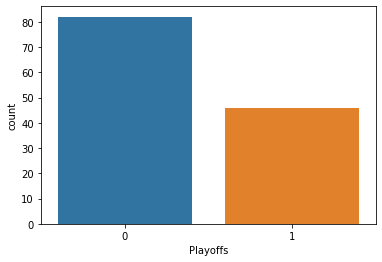

In [42]:
# starting by examining the distribution of the target column
print(train_data.Playoffs.value_counts())
sns.countplot(x = 'Playoffs',data = train_data) # from the output we can see that it is not severly misbalanced

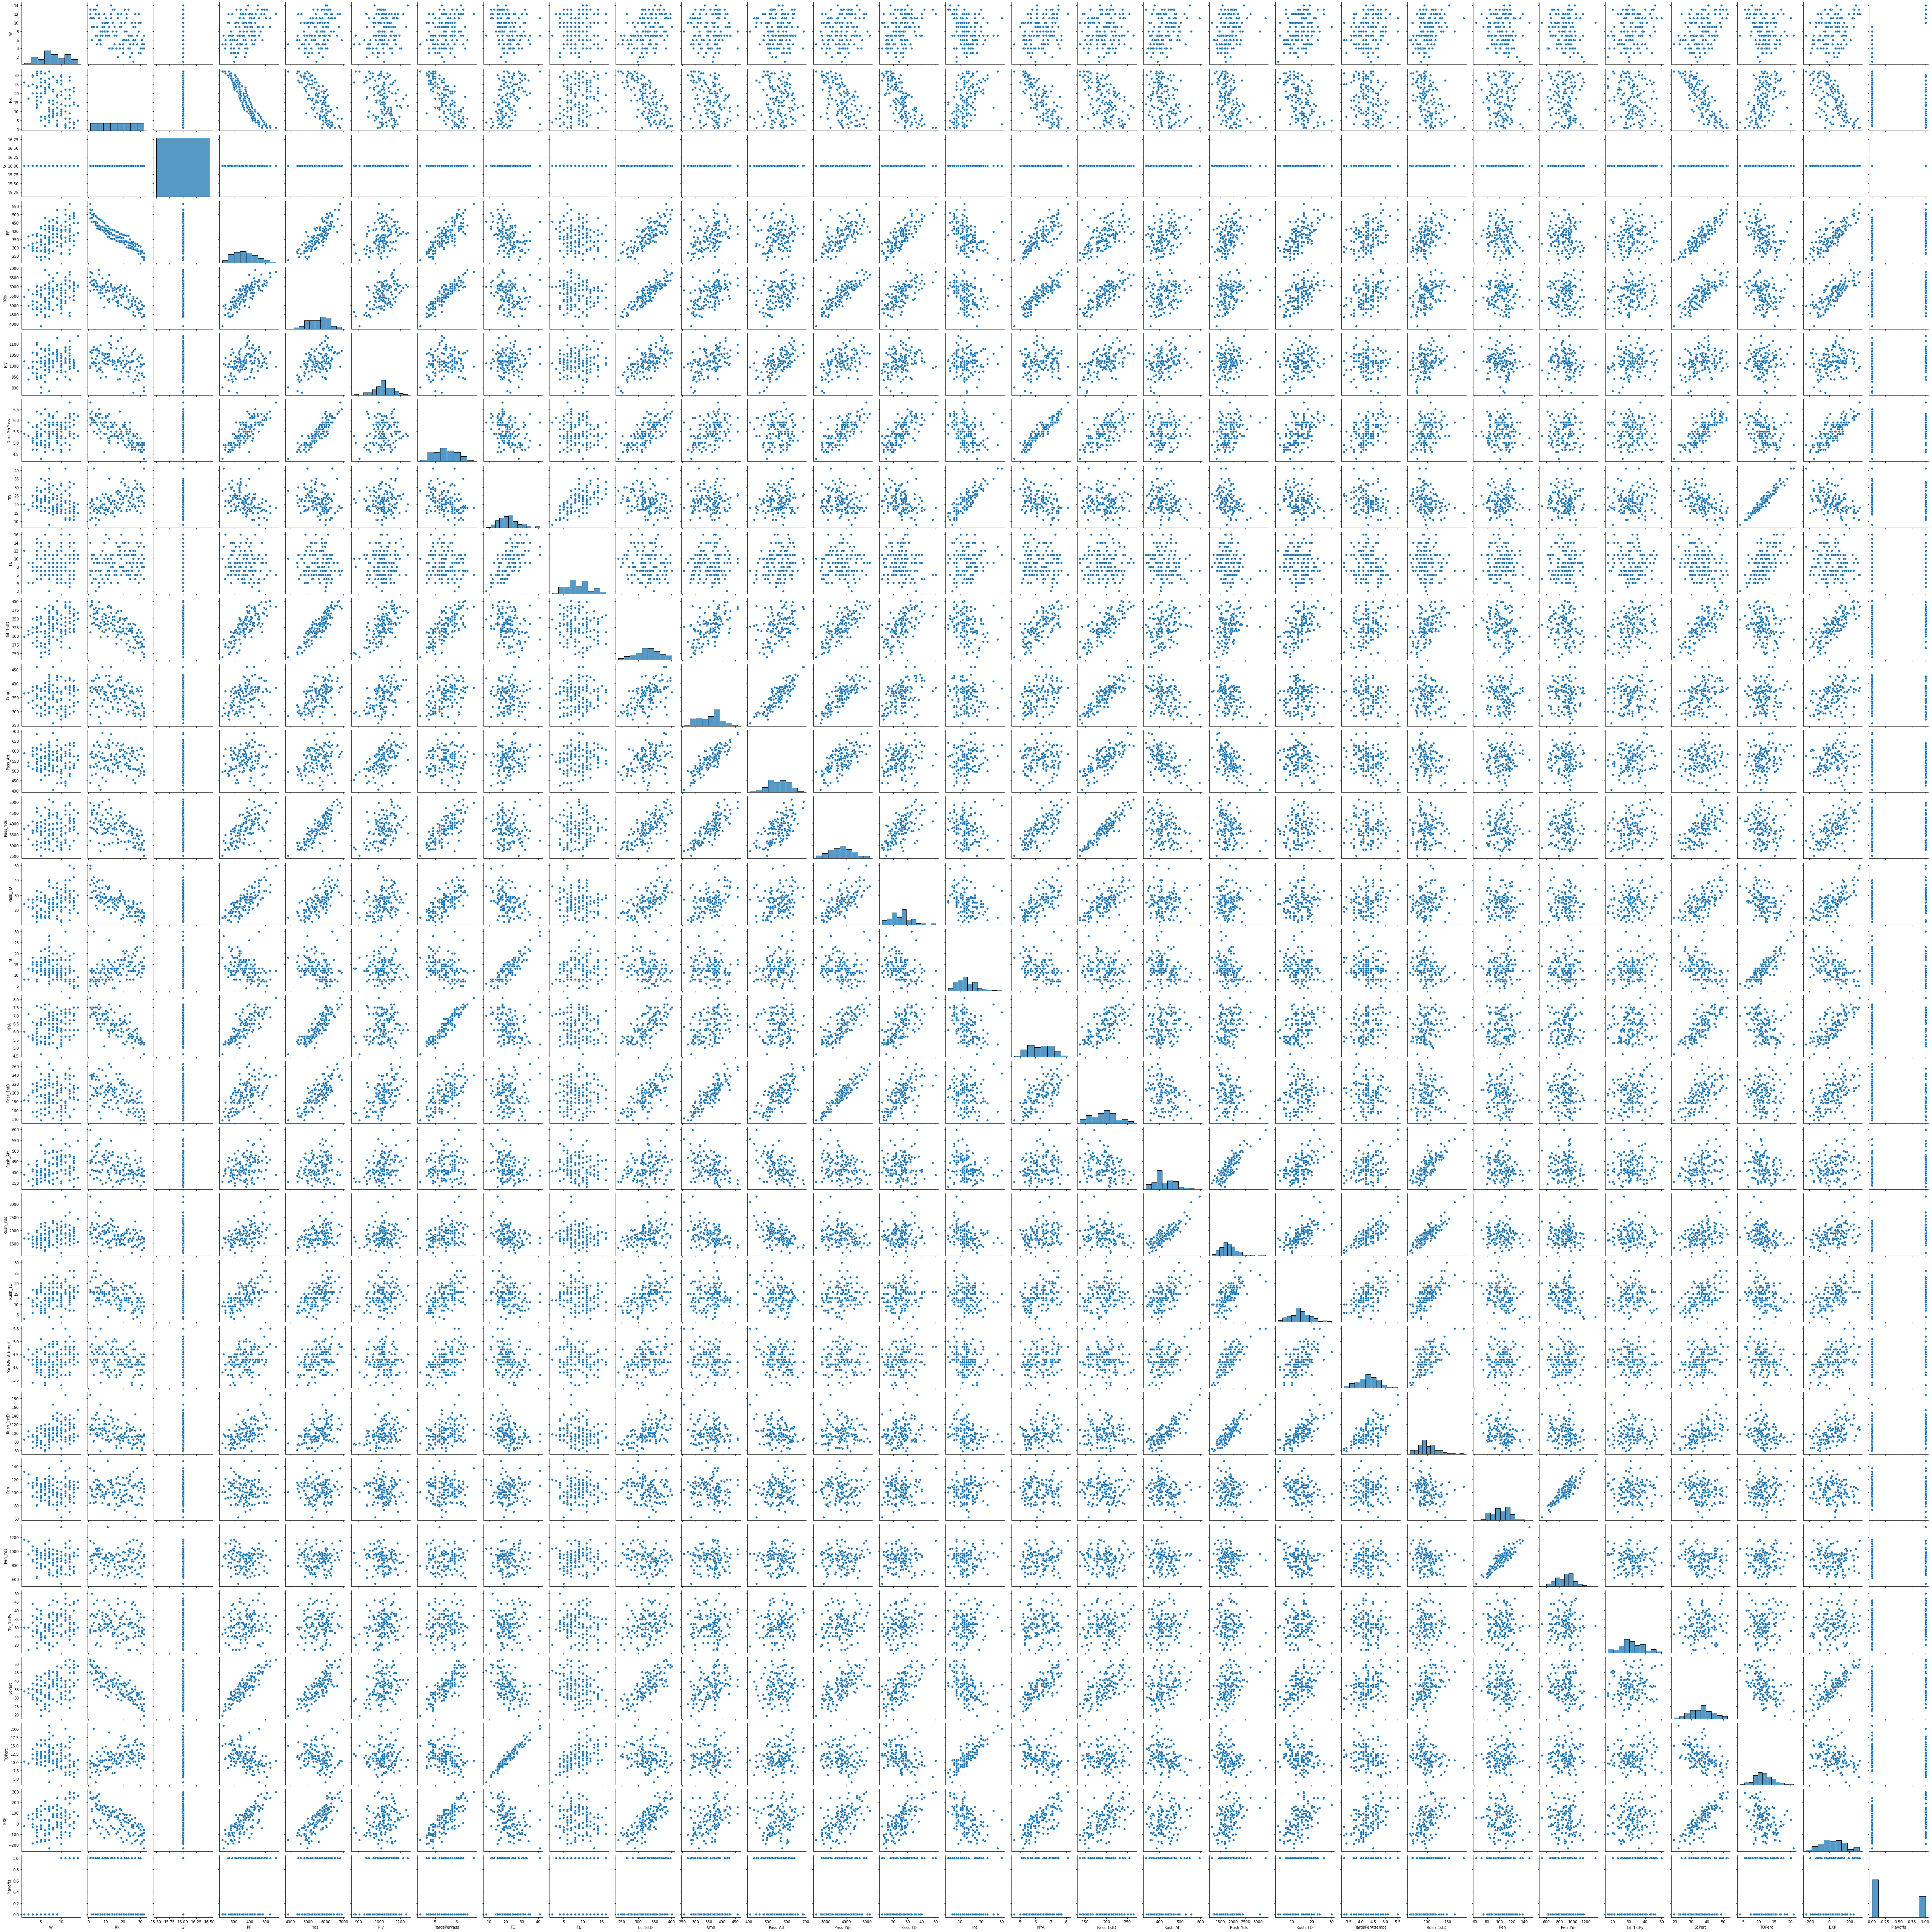

In [43]:
sns.pairplot(train_data)

In [50]:
# since winning determines whether a team goes to the playoffs or not it can be used to see the predictors that 
#could be most impactful
abs(train_data.corrwith(train_data['W'])).nlargest(7)

W            1.000000
PF           0.431749
Rk           0.419800
Rush_1stD    0.381409
ScPerc       0.368703
Rush_Att     0.331387
Rush_TD      0.329588
dtype: float64

<AxesSubplot:xlabel='Playoffs', ylabel='Rush_TD'>

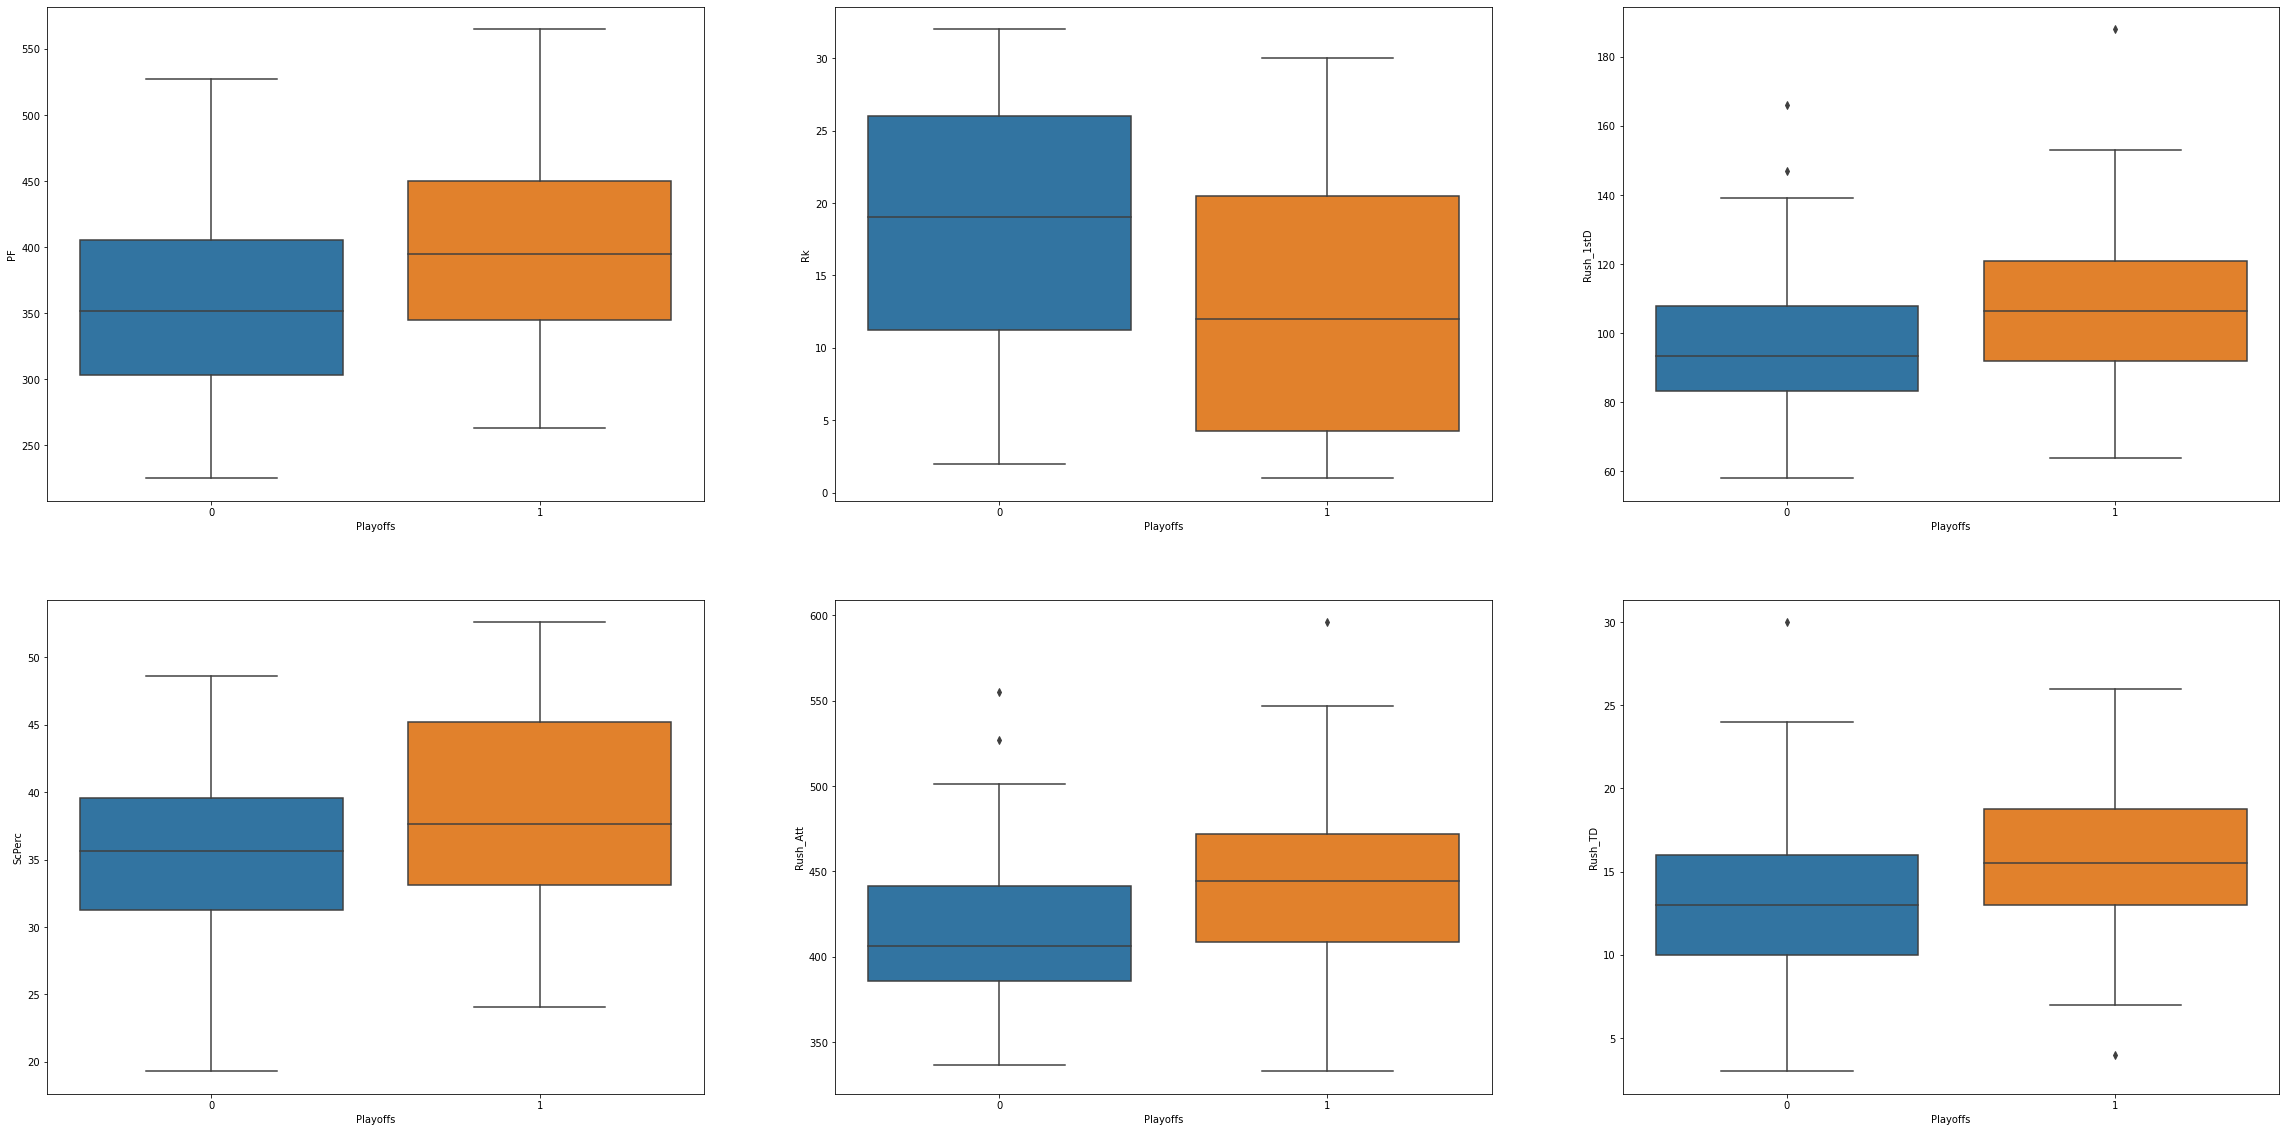

In [52]:
# visualizing the effect of the most correlated predictors on making the playoffs
fig, axs = plt.subplots(2, 3, figsize = (40,20))
sns.boxplot(ax = axs[0,0],x = 'Playoffs', y = 'PF', data = train_data)
sns.boxplot(ax = axs[0,1],x = 'Playoffs', y = 'Rk', data = train_data)
sns.boxplot(ax = axs[0,2],x = 'Playoffs', y = 'Rush_1stD', data = train_data)
sns.boxplot(ax = axs[1,0],x = 'Playoffs', y = 'ScPerc', data = train_data)
sns.boxplot(ax = axs[1,1],x = 'Playoffs', y = 'Rush_Att', data = train_data)
sns.boxplot(ax = axs[1,2],x = 'Playoffs', y = 'Rush_TD', data = train_data)


In [58]:
## using forward regression first ot determine which factors influence winning the most for the next season
#based on a linear regression

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('W ~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [59]:
#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [60]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [64]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [65]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [66]:
lst = list(train_data.columns)
lst = [i for i in X if i not in ['Tm', 'W', 'Playoffs']]
X = train_data[lst]
models_best = forward_selection()

Processed  27 models on 1 predictors in 0.23824381828308105 seconds.
Processed  26 models on 2 predictors in 0.11916089057922363 seconds.
Processed  25 models on 3 predictors in 0.15346002578735352 seconds.
Processed  24 models on 4 predictors in 0.16206598281860352 seconds.
Processed  23 models on 5 predictors in 0.1587510108947754 seconds.
Processed  22 models on 6 predictors in 0.20577001571655273 seconds.
Processed  21 models on 7 predictors in 0.18891119956970215 seconds.
Processed  20 models on 8 predictors in 0.21065902709960938 seconds.
Processed  19 models on 9 predictors in 0.21173977851867676 seconds.
Processed  18 models on 10 predictors in 0.21266388893127441 seconds.
Processed  17 models on 11 predictors in 0.21087193489074707 seconds.
Processed  16 models on 12 predictors in 0.21391701698303223 seconds.
Processed  15 models on 13 predictors in 0.19896316528320312 seconds.
Processed  14 models on 14 predictors in 0.20271587371826172 seconds.
Processed  13 models on 15 pre

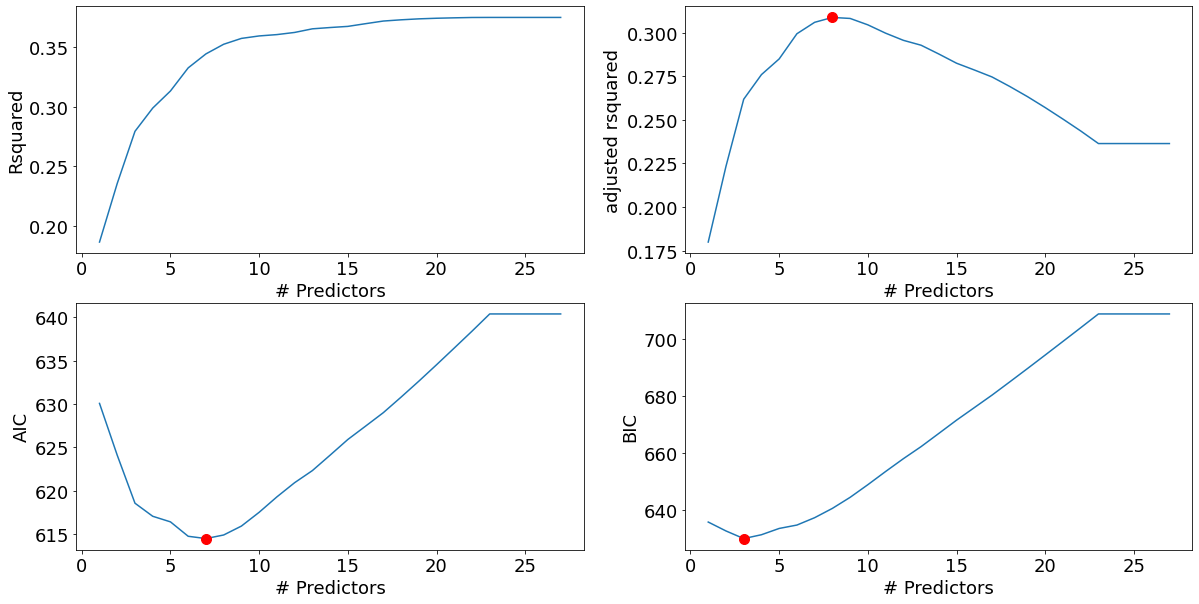

In [67]:
best_sub_plots()

In [69]:
bic = models_best.apply(lambda row: row[1].bic, axis=1)
best = models_best.loc[list(bic).index(min(bic)),'model']
best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     19.26
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           5.11e-08
Time:                        12:24:07   Log-Likelihood:                -309.04
No. Observations:                 128   AIC:                             624.1
Df Residuals:                     125   BIC:                             632.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2960      1.723      2.493      0.014       0.886       7.706
PF             0.0257      0.004      6.153      0.000       0.017       0.034
Pass_1stD     -0.0294      0.010     -2.835      0.005      -0.050      -0.009
==============================================================================
Omnibus:                        4.347   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                2.542
Skew:                           0.102   Prob(JB):                        0.281
Kurtosis:                       2.340   Cond. No.                     3.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train_data[['PF', 'Pass_1stD']]
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores) # the resulting VIF calculations have high VIF scores which signals multicolinearity

Attribute  VIF Scores
0         PF   40.022597
1  Pass_1stD   40.022597

Text(0, 0.5, 'Predicted W')

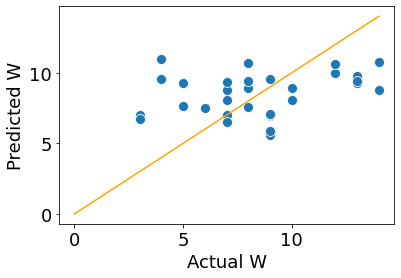

In [72]:
pred_W = best.predict(test_data)
sns.scatterplot(x = test_data.W, y = pred_W)
sns.lineplot(x = [0,test_data.W.max()], y = [0,test_data.W.max()],color='orange')
plt.xlabel('Actual W')
plt.ylabel('Predicted W')


In [73]:
np.sqrt(((test_data.W - pred_W)**2).mean())

2.93705487410049

In [76]:
df = pd.DataFrame({'Tm':test_data['Tm'], 'Actaul_W':test_data['W'],'Pred_W': pred_W})
df

Tm  Actaul_W     Pred_W
0          Arizona Cardinals         4   9.534530
1            Atlanta Falcons         7   6.573202
2           Baltimore Ravens        10   8.090390
3              Buffalo Bills        13   9.761070
4          Carolina Panthers         7   6.988170
5              Chicago Bears         3   6.991635
6         Cincinnati Bengals        12   9.992951
7           Cleveland Browns         7   8.054805
8             Dallas Cowboys        12  10.614789
9             Denver Broncos         5   7.636841
10             Detroit Lions         9   6.969204
11         Green Bay Packers         8   8.943639
12            Houston Texans         3   6.724638
13        Indianapolis Colts         4  10.965751
14      Jacksonville Jaguars         9   5.562057
15        Kansas City Chiefs        14   8.773942
16         Las Vegas Raiders         6   7.521929
17      Los Angeles Chargers        10   8.942935
18          Los Angeles Rams         5   9.258961
19            Miami Dolphins         9   6.998095
20         Minnesota Vikings        13   9.270998
21      New England Patriots         8  10.660822
22        New Orleans Saints         7   8.792024
23           New York Giants         9   5.895875
24             New York Jets         7   6.525581
25       Philadelphia Eagles        14  10.786129
26       Pittsburgh Steelers         9   7.108134
27       San Francisco 49ers        13   9.381038
28          Seattle Seahawks         9   9.558134
29      Tampa Bay Buccaneers         8   9.393254
30          Tennessee Titans         7   9.351913
31  Washington Football Team         8   7.578122

In [ ]:
#As can be seen by the results presented above the prediction is off by the RSME or around 3 games for each team
#At first glance 3 seems like a low number, but 3 games in a 17 game season is a significant error proportionaly. 